In [1]:
from library.objective_function import *
from library.optimiser import *
from library.post_analysis import *
from library.experiments import *
%matplotlib inline

In [2]:
class single_experiment:
    def set_objective(self, objective_func):
        self.objective_func = objective_func

    def set_optimizer(self, optimizer):
        self.optimizer = optimizer

    def do(self):
        optimal, optimum, statistics = self.optimizer.optimise(self.objective_func)
        if np.linalg.norm(optimal - self.objective_func.get_optimal()) < 1e-1 \
        or np.linalg.norm(optimum - self.objective_func.get_optimum()) < 1e-1:
            statistics['status'] = 'global minimum'
        elif statistics['status'] != 'diverge':
            statistics['status'] = 'local minimum'
        cost = np.linalg.norm(optimum - self.objective_func.get_optimum())
        if self.optimizer.verbose:
            print("\nResult: ", statistics['status'])
            print("Cost_val", cost)
        if self.optimizer.record == False:
            return statistics['status'], cost, statistics['evals']
        else:
            self.analyser = post_analysis(statistics, self.objective_func)

In [3]:
class multiple_experiment:
    def set_sample_zone(self, paras):
        self.paras = paras
        self.origin = paras['origin']
        self.edge = paras['edge']
        self.step = paras['step']
        self.sym = paras['sym'] if 'sym' in self.paras.keys() else False
        self.size = paras['size']
    def set_single_exp(self, exp):
        self.exp = exp
    def do(self):
        # get derivative parameters
        num_x = int(self.edge[0] / self.step)
        num_y = int(self.edge[1] / self.step)
        abs_edge = np.zeros((2,))
        abs_edge[0] = self.origin[0] + self.edge[0]
        
        # initlise matrix to record results
        avg_res = np.zeros((num_y, num_x))
        avg_cost = np.zeros_like(avg_res)
        avg_evals = np.zeros_like(avg_res)
        mask = np.ones_like(avg_res, dtype=np.uint8)
        position_x = np.zeros_like(avg_res)
        position_y = np.zeros_like(avg_res)
        
        for i, x in enumerate(np.arange(self.origin[0], abs_edge[0], self.step)):
            if self.sym:
                abs_edge[1] = self.origin[1] + x + self.step 
            else:
                abs_edge[1] = self.origin[1] + self.edge[1]
            for j, y in enumerate(np.arange(self.origin[1], abs_edge[1], self.step)):
                points = np.random.rand(self.size, 2) * self.step + np.array([x, y]) 
                mask[num_y-1-j, i] = 0
                position_x[num_y-1-j, i] = x
                position_y[num_y-1-j, i] = y
                opt_paras = self.exp.optimizer.paras
                # calculate the probility of getting global minimum 
                res = np.zeros((self.size, ))
                costs = np.zeros_like(res)
                evals = np.zeros_like(res)
                for k in range(self.size):
                    opt_paras['mean0'] = points[k].reshape(2,1)
                    self.exp.optimizer.set_parameters(opt_paras)
                    status, costs[k], evals[k] = self.exp.do()
                    if(status == 'global minimum'):
                        res[k] = 1
                avg_res[num_y-1-j, i] = np.mean(res)
                avg_cost[num_y-1-j, i] = np.mean(costs)
                avg_evals[num_y-1-j, i] = np.mean(evals)
        data = {'x': position_x, 
                'y': position_y,
                'mask': mask,
                'res': avg_res,
                'cost': avg_cost,
                'evals': avg_evals}
        self.analyser = post_analysis_multiple(self.paras, data)
        return data

# Original Ackley + Original CMA

In [65]:
np.random.seed(2391)

# init multiple experiments
exps_ak_no = multiple_experiment()

# init and setup one experiment
exp = single_experiment()

# One experiment: setup objective function
ak = ackley()
exp.set_objective(ak)

# One experiment: setup optimizer
cma = cma_es()
paras = {'mean0': np.zeros((2,)),
         'std': np.ones((2,)) * 3, 
         'tol': 1e-5, 
         'adjust_func': do_nothing(), 
         'record': False, 
         'verbose': False}
cma.set_parameters(paras)
exp.set_optimizer(cma)

# Multiple experiment: setup one expreiment
exps_ak_no.set_single_exp(exp)


# Multiple experiments: setup sample zone of multiple experiments
expsParas = {'origin': np.array([0,0]),
             'edge': np.array([500, 500]),
             'step': 20,
             'size': 10,
             'sym': True}
exps_ak_no.set_sample_zone(expsParas)

%time data_ak_no = exps_ak_no.do()

diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, concentrate in low dimension manifold
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, concentrate in low dimension manifold
CPU times: user 4min 47s, sys: 281 ms, total: 4min 47s
Wall time: 4min 47s


In [63]:
#exps.analyser.plot_scatter()

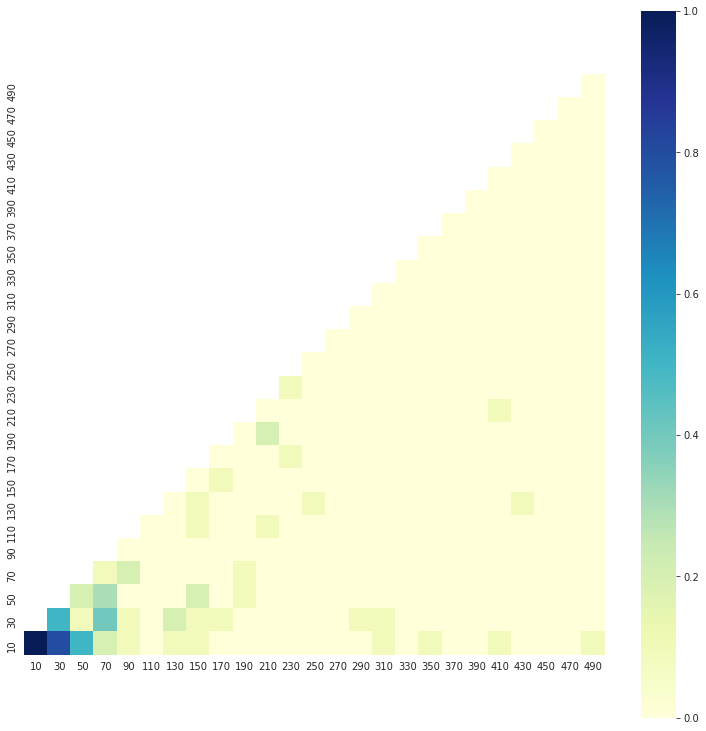

In [66]:
# start with random seed 2391
exps_ak_no.analyser.plot_hotmap_prob()

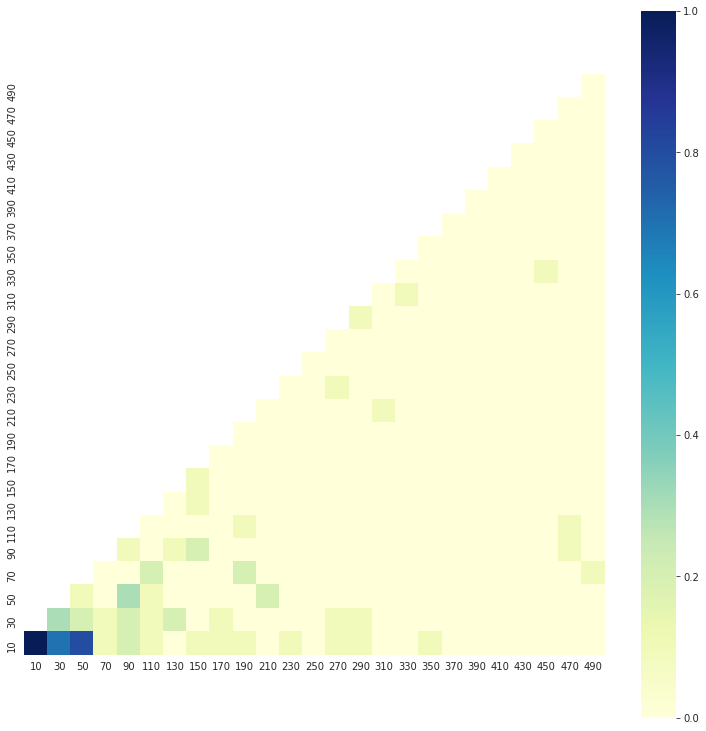

In [27]:
# start with seed 23191
exps.analyser.plot_hotmap_prob()

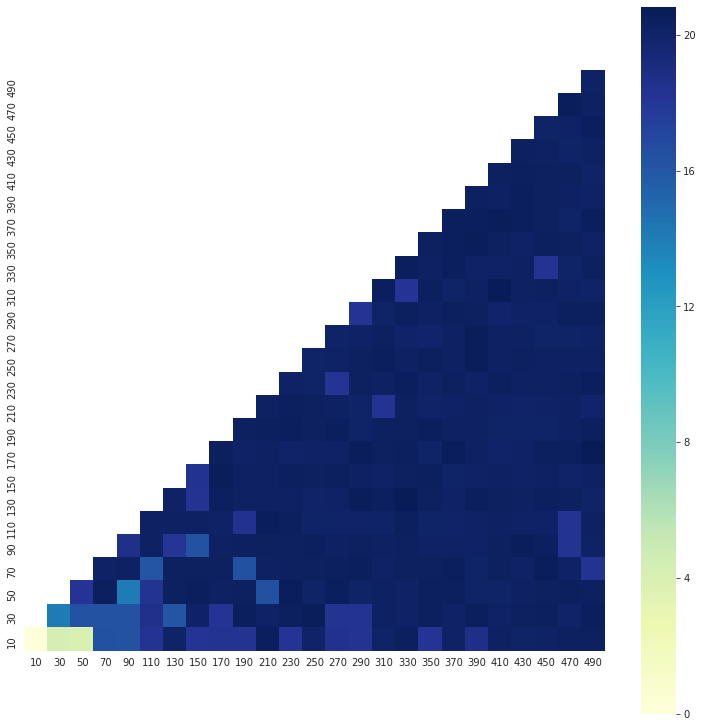

In [28]:
exps.analyser.plot_hotmap_cost()

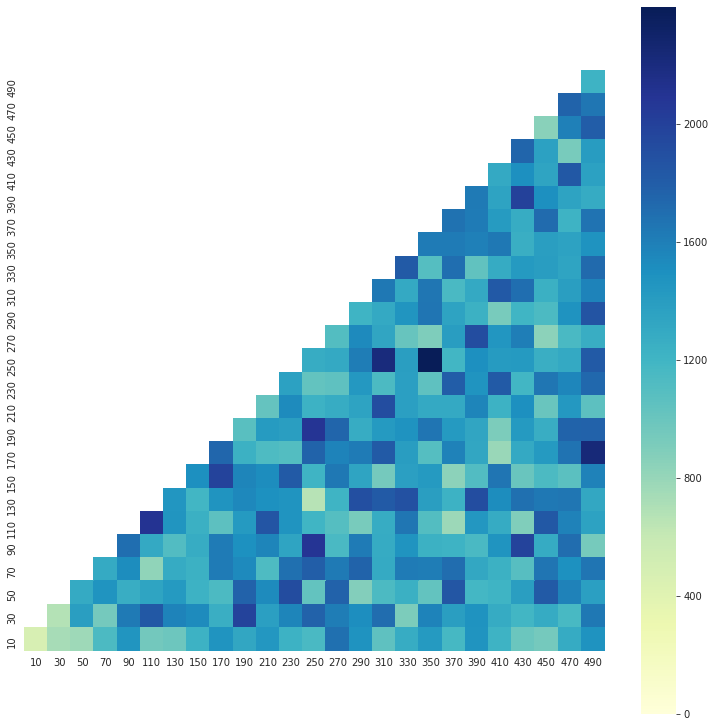

In [29]:
exps.analyser.plot_hotmap_evals()

# Original Ackley + CMA-line search(round off)

In [67]:
np.random.seed(2391)

# init multiple experiments
exps_ak_ro = multiple_experiment()

# init and setup one experiment
exp = single_experiment()

# One experiment: setup objective function
ak = ackley()
exp.set_objective(ak)

# One experiment: setup optimizer
cma = cma_es()
paras = {'mean0': np.zeros((2,)),
         'std': np.ones((2,)) * 3, 
         'tol': 1e-5, 
         'adjust_func': round_off(), 
         'record': False, 
         'verbose': False}
cma.set_parameters(paras)
exp.set_optimizer(cma)

# Multiple experiment: setup one expreiment
exps_ak_ro.set_single_exp(exp)


# Multiple experiments: setup sample zone of multiple experiments
expsParas = {'origin': np.array([0,0]),
             'edge': np.array([500, 500]),
             'step': 20,
             'size': 10,
             'sym': True}
exps_ak_ro.set_sample_zone(expsParas)

%time data_ak_ro = exps_ak_ro.do()

/Users/huajian/Non-convex/library/optimiser.py:199: RuntimeWarning:

invalid value encountered in sqrt

/Users/huajian/miniconda3/envs/ada/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning:

invalid value encountered in reduce

/Users/huajian/Non-convex/library/optimiser.py:90: RuntimeWarning:

invalid value encountered in less

/Users/huajian/Non-convex/library/optimiser.py:93: RuntimeWarning:

invalid value encountered in less



diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, concentrate in low dimension manifold
diverge, concentrate in low dimension manifold
CPU times: user 3min 13s, sys: 935 ms, total: 3min 14s
Wall time: 3min 16s


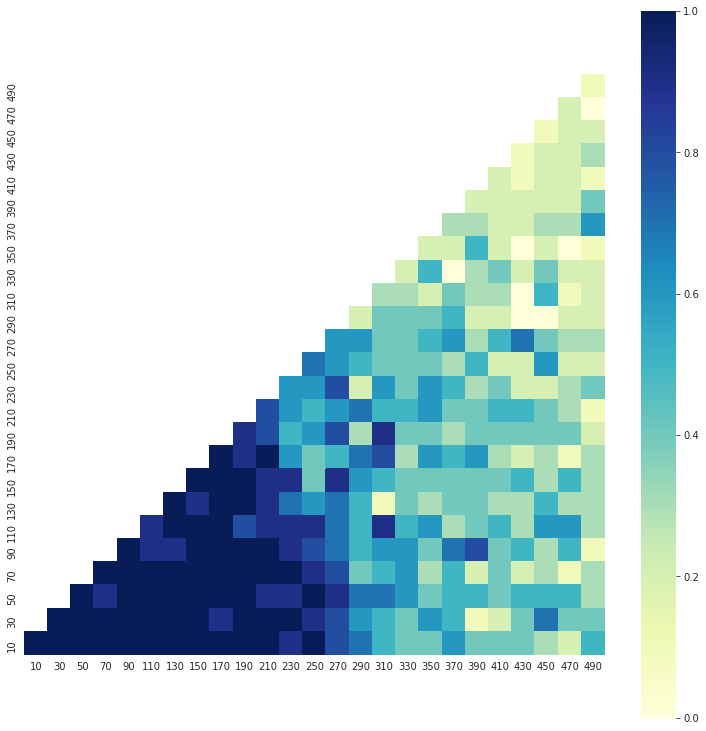

In [68]:
# start with seed 2391
exps_ak_ro.analyser.plot_hotmap_prob()

In [62]:
#exps2.analyser.plot_scatter()

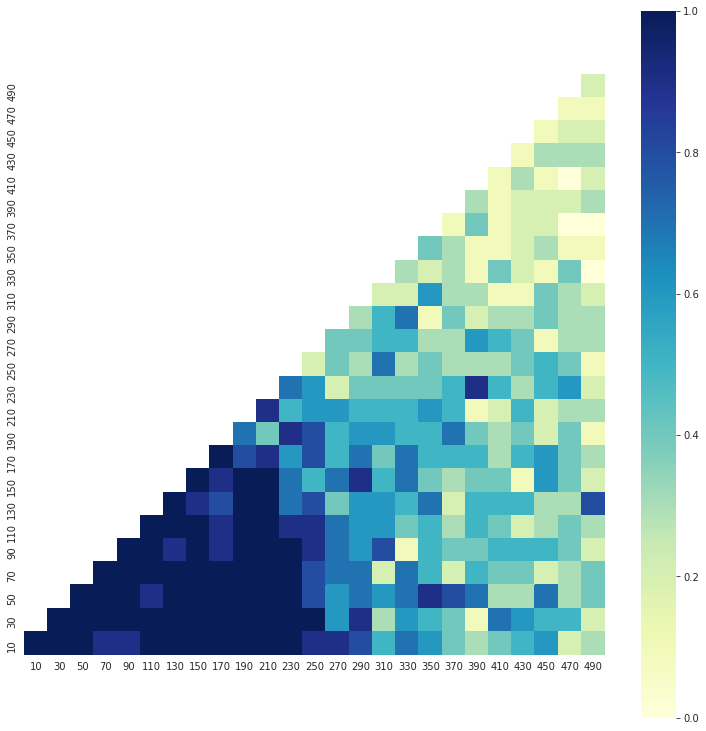

In [36]:
exps2.analyser.plot_hotmap_prob()

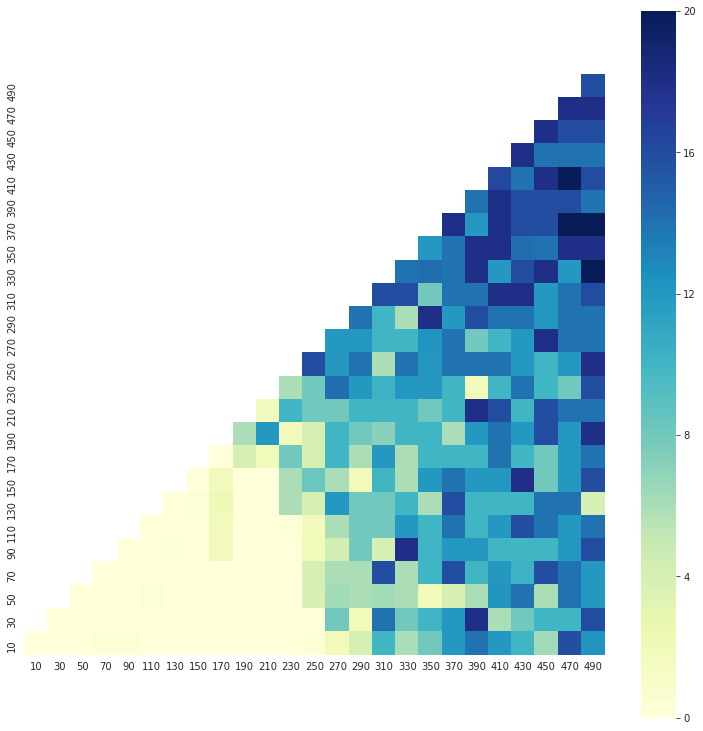

In [37]:
exps2.analyser.plot_hotmap_cost()

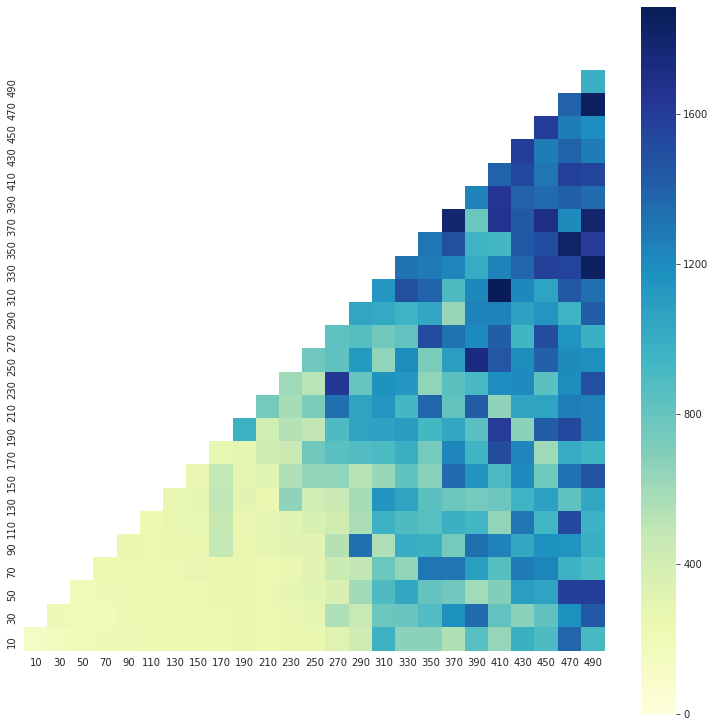

In [38]:
exps2.analyser.plot_hotmap_evals()

## summary on  ackley
| -- |original CMA | line search (default(medium) step size) - CMA  | round off - CMA|
| -- | -- | --| -- |
| #experiments| 100 experiments | 100 experiments | 100 experiments |
| total time| 3.9 s | 33.8 s |  2.8 s |
| evalutaions per exp | 0.6 k evals |  11.5 k evals | 0.3 k evals |
| *performance* | -- | -- | -- |
| probability |  0.75  | 0.8 | 0.25 |
| cost | 2.48 | 2.20 | 6.97 |

# bukin + original CMA

In [8]:
np.random.seed(23191)

# init multiple experiments
exps3 = multiple_experiment()

# init and setup one experiment
exp = single_experiment()

# One experiment: setup objective function
bk = bukin()
exp.set_objective(bk)

# One experiment: setup optimizer
cma = cma_es()
paras = {'mean0': np.zeros((2,)),
         'std': np.ones((2,)) * 0.003, 
         'tol': 1e-5, 
         'adjust_func': do_nothing(), 
         'record': False, 
         'verbose': False}
cma.set_parameters(paras)
exp.set_optimizer(cma)

# Multiple experiment: setup one expreiment
exps3.set_single_exp(exp)


# Multiple experiments: setup sample zone of multiple experiments
expsParas = {'origin': np.array([-15, -5]),
             'edge': np.array([30, 10]),
             'step': 1,
             'size': 10,
             'sym': False}
exps3.set_sample_zone(expsParas)

%time data3 = exps3.do()

diverge, concentrate in low dimension manifold
diverge, concentrate in low dimension manifold
diverge, concentrate in low dimension manifold
diverge, concentrate in low dimension manifold
diverge, concentrate in low dimension manifold
diverge, concentrate in low dimension manifold
diverge, concentrate in low dimension manifold
diverge, concentrate in low dimension manifold
diverge, concentrate in low dimension manifold
diverge, concentrate in low dimension manifold
diverge, concentrate in low dimension manifold
diverge, concentrate in low dimension manifold
diverge, concentrate in low dimension manifold
diverge, concentrate in low dimension manifold
diverge, concentrate in low dimension manifold
diverge, concentrate in low dimension manifold
diverge, concentrate in low dimension manifold
diverge, concentrate in low dimension manifold
diverge, concentrate in low dimension manifold
diverge, concentrate in low dimension manifold
diverge, concentrate in low dimension manifold
diverge, conc

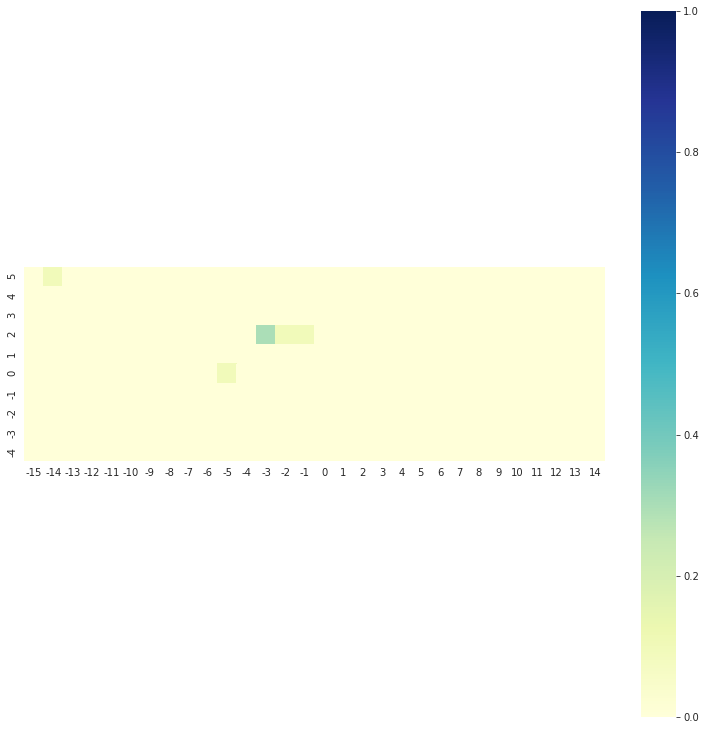

In [9]:
exps3.analyser.plot_hotmap_prob()

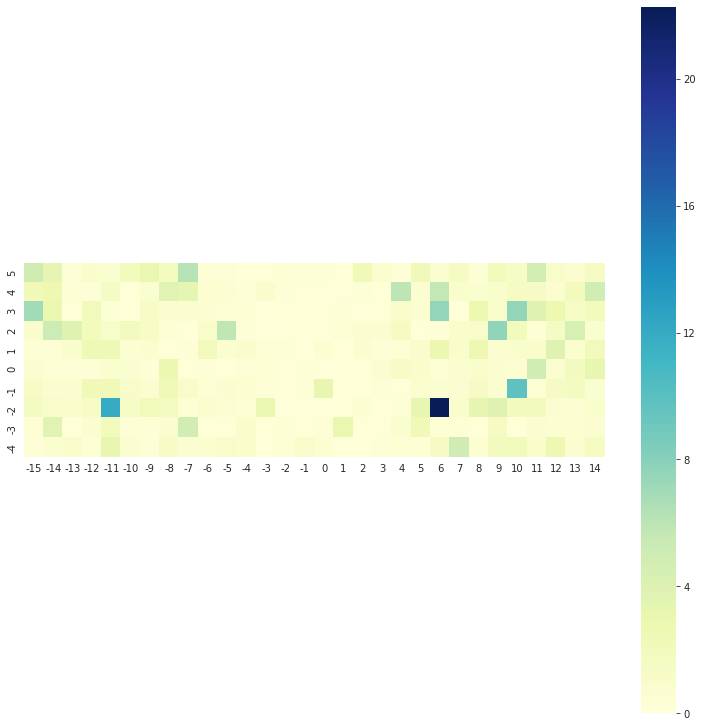

In [10]:
exps3.analyser.plot_hotmap_cost()

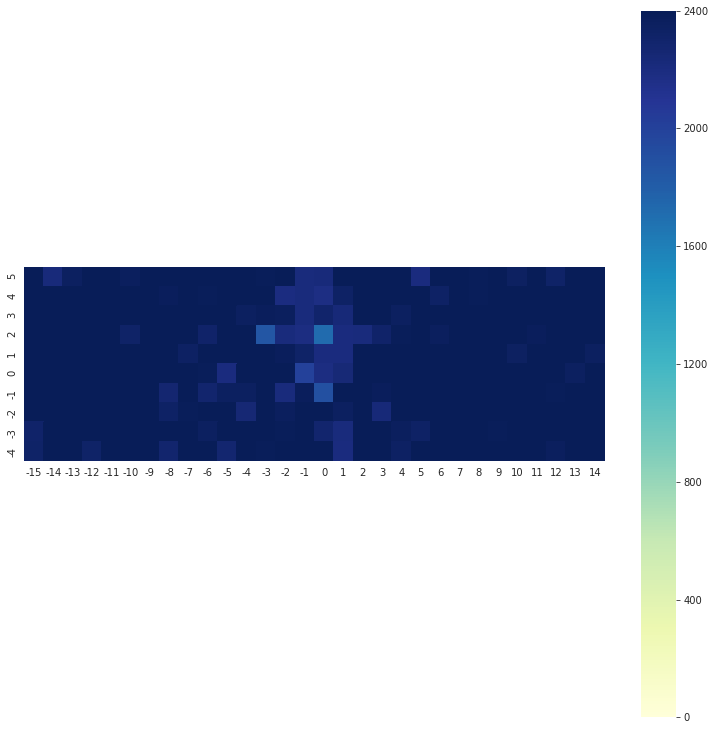

In [11]:
exps3.analyser.plot_hotmap_evals()

# test the effiency of optimizer

In [3]:
np.random.seed(23191)

# init multiple experiments
exps3 = multiple_experiment()

# init and setup one experiment
exp = single_experiment()

# One experiment: setup objective function
bk = bukin()
exp.set_objective(bk)

# One experiment: setup optimizer
cma = cma_es()
paras = {'x0': np.zeros((2,)),
         'std': np.ones((2,)) * 0.003, 
         'tol': 1e-5, 
         'adjust_func': do_nothing(), 
         'record': False, 
         'verbose': False}
cma.set_parameters(paras)
exp.set_optimizer(cma)

# Multiple experiment: setup one expreiment
exps3.set_single_exp(exp)


# Multiple experiments: setup sample zone of multiple experiments
expsParas = {'origin': np.array([-15, -5]),
             'edge': np.array([30, 10]),
             'step': 10,
             'size': 10,
             'sym': False}
exps3.set_sample_zone(expsParas)

%time data3 = exps3.do()

CPU times: user 3.98 s, sys: 26.9 ms, total: 4.01 s
Wall time: 4.08 s


In [6]:
data3

{'x': array([[-15.,  -5.,   5.]]),
 'y': array([[-5., -5., -5.]]),
 'mask': array([[0, 0, 0]], dtype=uint8),
 'res': array([[0., 0., 0.]]),
 'cost': array([[1.62891016, 0.14725256, 4.2152041 ]]),
 'evals': array([[2400. , 2214.6, 2400. ]])}

In [4]:
data3['evals'].mean()

2338.2000000000003

In [5]:
data3['cost'].mean()

1.9971222739684433

In [7]:
data3['res'].mean()

0.0

In [ ]:
np.random.seed(2311)

# init multiple experiments
exps3 = multiple_experiment()

# init and setup one experiment
exp = single_experiment()

# One experiment: setup objective function
bk = bukin()
exp.set_objective(bk)

# One experiment: setup optimizer
cma = cma_es()
paras = {'x0': np.zeros((2,)),
         'std': np.ones((2,)) * 0.003, 
         'tol': 1e-5, 
         'adjust_func': line_search(alpha=1e-5, beta=2e-5), 
         'record': False, 
         'verbose': False}
cma.set_parameters(paras)
exp.set_optimizer(cma)

# Multiple experiment: setup one expreiment
exps3.set_single_exp(exp)


# Multiple experiments: setup sample zone of multiple experiments
expsParas = {'origin': np.array([-15, -5]),
             'edge': np.array([30, 10]),
             'step': 10,
             'size': 10,
             'sym': False}
exps3.set_sample_zone(expsParas)

%time data3 = exps3.do()

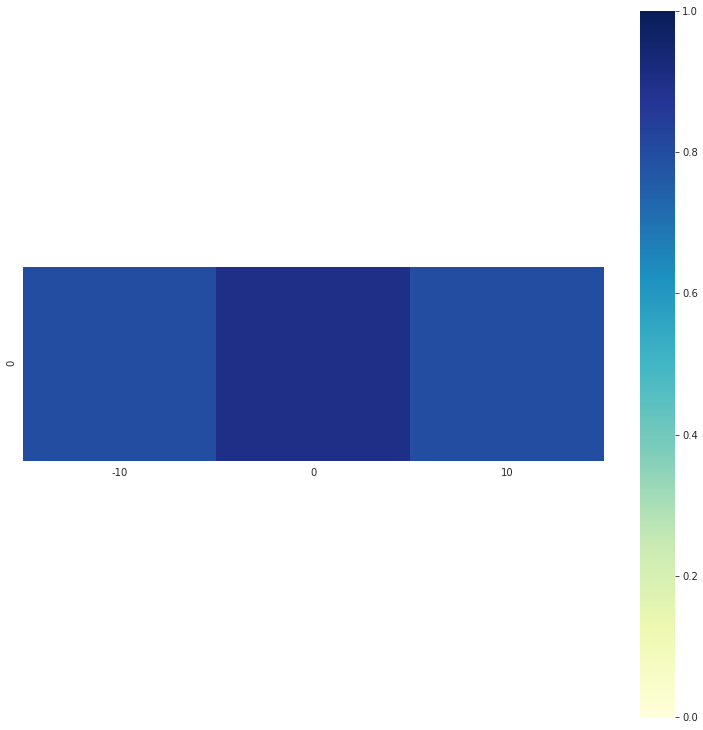

In [26]:
exps3.analyser.plot_hotmap_prob()

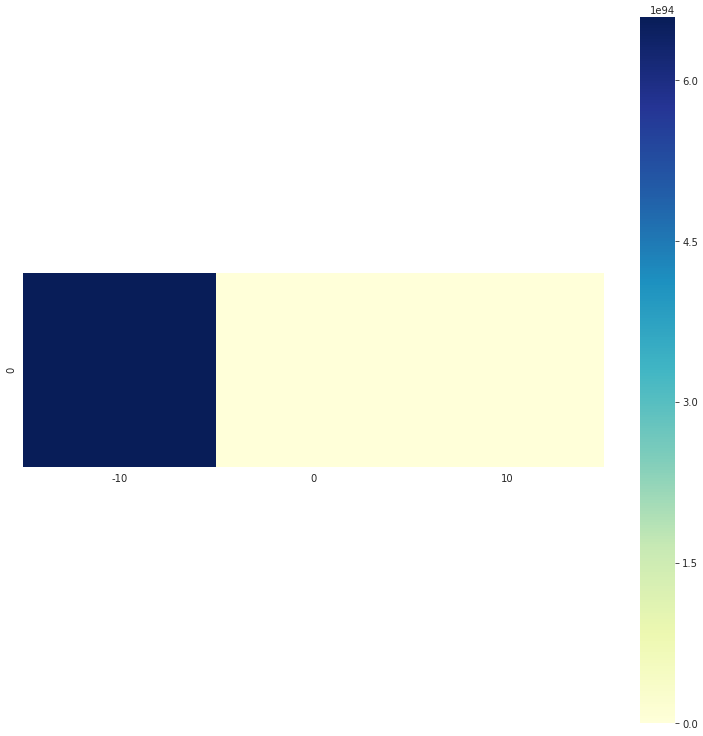

In [27]:
exps3.analyser.plot_hotmap_cost()

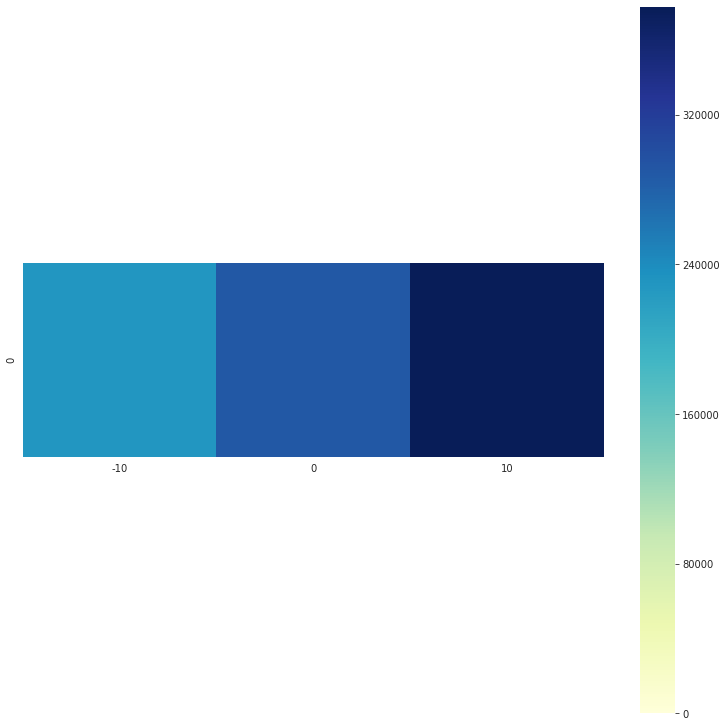

In [28]:
exps3.analyser.plot_hotmap_evals()

In [29]:
data3

{'x': array([[-15.,  -5.,   5.]]),
 'y': array([[-5., -5., -5.]]),
 'mask': array([[0, 0, 0]], dtype=uint8),
 'res': array([[0.8, 0.9, 0.8]]),
 'cost': array([[6.59438043e+94, 2.14207190e+04, 2.65597313e+02]]),
 'evals': array([[229115.4, 290124.5, 377703. ]])}

In [11]:
np.mean([0.8, 0.9, 0.8])

0.8333333333333334

In [11]:
np.random.seed(23191)

# init multiple experiments
exps_bk_ad = multiple_experiment()

# init and setup one experiment
exp = single_experiment()

# One experiment: setup objective function
bk = bukin()
exp.set_objective(bk)

# One experiment: setup optimizer
ad = adam()
optmizerParas = {'x0': np.zeros((2,)),
         'alpha': 0.01,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-8, 
         'max_iter': 1000,
         'tol': 1e-2,              
         'verbose': False,
         'record': False}
ad.set_parameters(optmizerParas)
exp.set_optimizer(ad)

# Multiple experiment: setup one expreiment
exps_bk_ad.set_single_exp(exp)


# Multiple experiments: setup sample zone of multiple experiments
zoneParas = {'origin': np.array([-15, -5]),
             'edge': np.array([30, 10]),
             'step': 10,
             'size': 10,
             'sym': False}
exps_bk_ad.set_sample_zone(zoneParas)

%time data_bk_ad = exps_bk_ad.do()

CPU times: user 927 ms, sys: 19.6 ms, total: 946 ms
Wall time: 975 ms


In [13]:
for i in range(0, 10):
    # One experiment: setup optimizer
    ad = adam()
    optmizerParas = {'x0': np.zeros((2,)),
             'alpha': 0.01* np.power(0.1, i),
             'beta_1': 0.9, 
             'beta_2': 0.999, 
             'epsilon': 1e-8, 
             'max_iter': 1000,
             'tol': 1e-2,              
             'verbose': True,
             'record': False}
    ad.set_parameters(optmizerParas)
    exp.set_optimizer(ad)

    # Multiple experiment: setup one expreiment
    exps_bk_ad.set_single_exp(exp)


    # Multiple experiments: setup sample zone of multiple experiments
    zoneParas = {'origin': np.array([-15, -5]),
                 'edge': np.array([30, 10]),
                 'step': 10,
                 'size': 10,
                 'sym': False}
    exps_bk_ad.set_sample_zone(zoneParas)

    %time data_bk_ad = exps_bk_ad.do()


Result:  local minimum
Cost_val 34.319003245162484

Result:  local minimum
Cost_val 5.155909214883017

Result:  local minimum
Cost_val 20.43818871306192

Result:  local minimum
Cost_val 3.929842475978491

Result:  local minimum
Cost_val 9.193891507496183

Result:  local minimum
Cost_val 27.475683719741486

Result:  local minimum
Cost_val 4.190939263564424

Result:  local minimum
Cost_val 7.6833840461923835

Result:  local minimum
Cost_val 17.50510942786457

Result:  local minimum
Cost_val 7.76767814532618

Result:  local minimum
Cost_val 10.236824445877916

Result:  local minimum
Cost_val 21.647296906383396

Result:  local minimum
Cost_val 28.0465998993808

Result:  local minimum
Cost_val 19.009848166209096

Result:  local minimum
Cost_val 6.113918984790935

Result:  local minimum
Cost_val 12.24206077507813

Result:  local minimum
Cost_val 12.193439380937983

Result:  local minimum
Cost_val 10.218027048257008

Result:  local minimum
Cost_val 4.657108640474416

Result:  local minimum
C

In [5]:
data_bk_ad

{'x': array([[-15.,  -5.,   5.]]),
 'y': array([[-5., -5., -5.]]),
 'mask': array([[0, 0, 0]], dtype=uint8),
 'res': array([[0., 0., 0.]]),
 'cost': array([[29.68620234, 29.68620234, 29.68620234]]),
 'evals': array([[1000., 1000., 1000.]])}

In [6]:
data_bk_ad['evals'].mean()

1000.0

In [8]:
data_bk_ad['cost'].mean()

29.686202341235617

In [7]:
data_bk_ad['res'].mean()

0.0

## summary of bukin
| -- | line search (very small step size) - CMA | original CMA | adam |
| -- | -- | --| -- |
| #experiments| 30 experiments | 30 experiments | 30 experiments |
| total time| 111 s | 4.5 s | 0.7 s |
| evalutaions per exp | 299 k evals |  2.3 k evals | 1 k evals |
| prob | 0.83 | 0 | 0 |

# bukin + CMA-line search

In [ ]:
np.random.seed(23191)

# init multiple experiments
exps3 = multiple_experiment()

# init and setup one experiment
exp = single_experiment()

# One experiment: setup objective function
bk = bukin()
exp.set_objective(bk)

# One experiment: setup optimizer
cma = cma_es()
paras = {'mean0': np.zeros((2,)),
         'std': np.ones((2,)) * 0.003, 
         'tol': 1e-5, 
         'adjust_func': line_search(alpha=1e-5, beta=2e-5), 
         'record': False, 
         'verbose': True}
cma.set_parameters(paras)
exp.set_optimizer(cma)

# Multiple experiment: setup one expreiment
exps3.set_single_exp(exp)


# Multiple experiments: setup sample zone of multiple experiments
expsParas = {'origin': np.array([-15, -5]),
             'edge': np.array([30, 10]),
             'step': 1,
             'size': 10,
             'sym': False}
exps3.set_sample_zone(expsParas)

data3 = exps3.do()

# tuned ackley + original CMA

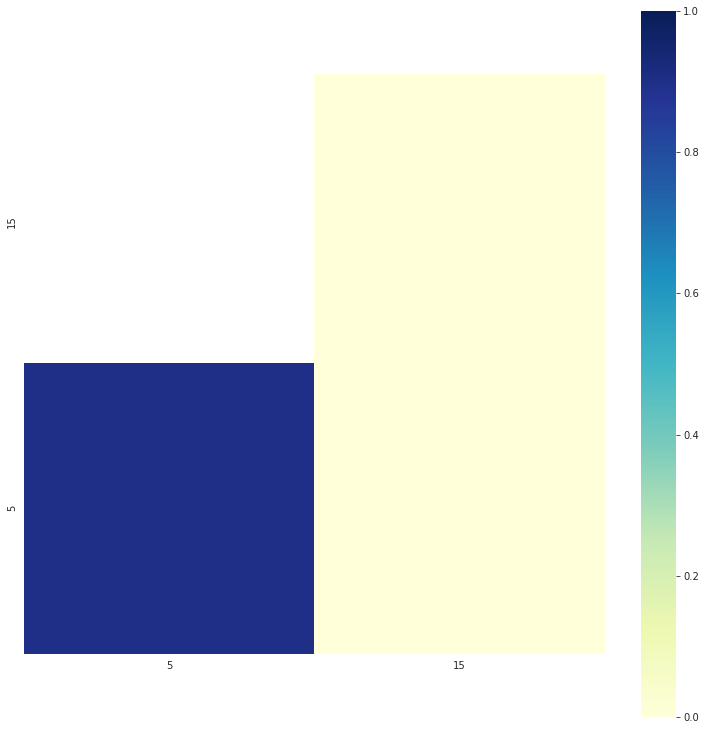

In [37]:
exps5.analyser.plot_hotmap_prob()

In [48]:
np.random.seed(2311)

# init multiple experiments
exps5 = multiple_experiment()

# init and setup one experiment
exp = single_experiment()

# One experiment: setup objective function
tak = tuned_ackley()
exp.set_objective(tak)

# One experiment: setup optimizer
cma = cma_es()
paras = {'mean0': np.zeros((2,)),
         'std': np.ones((2,)) * 3, 
         'tol': 1e-5, 
         'adjust_func': do_nothing(), 
         'record': False, 
         'verbose': False}
cma.set_parameters(paras)
exp.set_optimizer(cma)

# Multiple experiment: setup one expreiment
exps5.set_single_exp(exp)


# Multiple experiments: setup sample zone of multiple experiments
expsParas = {'origin': np.array([0, 0]),
             'edge': np.array([20, 20]),
             'step': 5,
             'size': 10,
             'sym': True}
exps5.set_sample_zone(expsParas)

%time data5 = exps5.do()

CPU times: user 3.78 s, sys: 32 ms, total: 3.81 s
Wall time: 3.9 s


In [49]:
data5

{'x': array([[ 0.,  0.,  0., 15.],
        [ 0.,  0., 10., 15.],
        [ 0.,  5., 10., 15.],
        [ 0.,  5., 10., 15.]]),
 'y': array([[ 0.,  0.,  0., 15.],
        [ 0.,  0., 10., 10.],
        [ 0.,  5.,  5.,  5.],
        [ 0.,  0.,  0.,  0.]]),
 'mask': array([[1, 1, 1, 0],
        [1, 1, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 0, 0]], dtype=uint8),
 'res': array([[0. , 0. , 0. , 0.8],
        [0. , 0. , 0.7, 0.8],
        [0. , 1. , 0.7, 0.5],
        [1. , 1. , 0.7, 0.3]]),
 'cost': array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.45635286e+00],
        [0.00000000e+00, 0.00000000e+00, 2.23369673e+00, 1.38818818e+00],
        [0.00000000e+00, 5.62749786e-06, 1.88484099e+00, 3.09685665e+00],
        [5.39433164e-06, 6.18785808e-06, 1.81758492e+00, 4.94348520e+00]]),
 'evals': array([[  0. ,   0. ,   0. , 950.4],
        [  0. ,   0. , 475.2, 507.6],
        [  0. , 435.6, 479.4, 456. ],
        [414. , 425.4, 451.8, 481.2]])}

In [58]:
data5['evals'].sum()/10

507.66

In [59]:
data5['cost'].sum()/10

2.482102273543969

In [60]:
data5['res'].sum()/10

0.75

In [42]:
# with too small std
data5

{'x': array([[ 0.,  0.,  0., 15.],
        [ 0.,  0., 10., 15.],
        [ 0.,  5., 10., 15.],
        [ 0.,  5., 10., 15.]]),
 'y': array([[ 0.,  0.,  0., 15.],
        [ 0.,  0., 10., 10.],
        [ 0.,  5.,  5.,  5.],
        [ 0.,  0.,  0.,  0.]]),
 'mask': array([[1, 1, 1, 0],
        [1, 1, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 0, 0]], dtype=uint8),
 'res': array([[0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0. , 0.4, 0. , 0. ],
        [1. , 0.9, 0.1, 0. ]]),
 'cost': array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.72817182e+01],
        [0.00000000e+00, 0.00000000e+00, 1.52224964e+01, 4.72817182e+01],
        [0.00000000e+00, 8.38348501e+00, 1.26473405e+01, 3.92524218e+01],
        [6.63354127e-06, 1.40075515e+00, 1.55405996e+01, 1.30243484e+01]]),
 'evals': array([[  0. ,   0. ,   0. ,  12. ],
        [  0. ,   0. , 294. ,  12. ],
        [  0. , 388.8, 270. , 120.6],
        [495.6, 511.8, 526.8, 474.6]])}

In [45]:
np.random.seed(2311)

# init multiple experiments
exps6 = multiple_experiment()

# init and setup one experiment
exp = single_experiment()

# One experiment: setup objective function
tak = tuned_ackley()
exp.set_objective(tak)

# One experiment: setup optimizer
cma = cma_es()
paras = {'mean0': np.zeros((2,)),
         'std': np.ones((2,)) * 3, 
         'tol': 1e-5, 
         'adjust_func': line_search(), 
         'record': False, 
         'verbose': True}
cma.set_parameters(paras)
exp.set_optimizer(cma)

# Multiple experiment: setup one expreiment
exps6.set_single_exp(exp)


# Multiple experiments: setup sample zone of multiple experiments
expsParas = {'origin': np.array([0, 0]),
             'edge': np.array([20, 20]),
             'step': 5,
             'size': 10,
             'sym': True}
exps6.set_sample_zone(expsParas)

%time data6 = exps6.do()

*******starting optimisation from intitial mean:  [1.60782339 4.23005717]
eigenvalue of variance = [8.33563956 8.95129919]
total iterations = 2, total evaluatios = 3078
found minimum position = [-1.37357633e-16  2.75345356e-16], found minimum = 2.718281828459045

Result:  global minimum
Cost_val 0.0
*******starting optimisation from intitial mean:  [1.09385814 0.74740298]
eigenvalue of variance = [8.25498265 7.87325515]
total iterations = 2, total evaluatios = 3082
found minimum position = [ 1.37383957e-17 -5.54788123e-17], found minimum = 2.718281828459045

Result:  global minimum
Cost_val 0.0
*******starting optimisation from intitial mean:  [0.25561291 3.54025274]
eigenvalue of variance = [6.997661   7.85490619]
total iterations = 3, total evaluatios = 4411
found minimum position = [-4.67164890e-17  1.42317651e-16], found minimum = 2.718281828459045

Result:  global minimum
Cost_val 0.0
*******starting optimisation from intitial mean:  [0.07394369 0.62737156]
eigenvalue of variance 

eigenvalue of variance = [5.95712403 6.59938585]
total iterations = 5, total evaluatios = 6066
found minimum position = [-1.74618385e-16  1.18680992e-16], found minimum = 2.718281828459045

Result:  global minimum
Cost_val 0.0
*******starting optimisation from intitial mean:  [6.03989406 5.65400526]
eigenvalue of variance = [6.45244274 5.94672243]
total iterations = 5, total evaluatios = 6506
found minimum position = [-1.74083306e-16 -1.35555516e-16], found minimum = 2.718281828459045

Result:  global minimum
Cost_val 0.0
*******starting optimisation from intitial mean:  [10.11289774  2.76918482]
eigenvalue of variance = [5.85651092 4.94257307]
total iterations = 7, total evaluatios = 8063
found minimum position = [-1.81354369e-16  2.22621230e-16], found minimum = 2.718281828459045

Result:  global minimum
Cost_val 0.0
*******starting optimisation from intitial mean:  [14.20255606  2.97973553]
eigenvalue of variance = [5.30783973 4.34347314]
total iterations = 9, total evaluatios = 833

eigenvalue of variance = [5.00945712 3.69642401]
total iterations = 25, total evaluatios = 9284
found minimum position = [ 4.41512624e-17 -9.38989689e-17], found minimum = 2.718281828459045

Result:  global minimum
Cost_val 0.0
*******starting optimisation from intitial mean:  [11.58817722 12.20191887]
eigenvalue of variance = [6.36122977 5.22316445]
total iterations = 11, total evaluatios = 6902
found minimum position = [9.04526124e-17 8.21584862e-18], found minimum = 2.718281828459045

Result:  global minimum
Cost_val 0.0
*******starting optimisation from intitial mean:  [13.53187705 10.59014128]
eigenvalue of variance = [2.78587274 1.66875253]
total iterations = 34, total evaluatios = 14290
found minimum position = [1.69980480e-16 1.56783989e-16], found minimum = 2.718281828459045

Result:  global minimum
Cost_val 0.0
*******starting optimisation from intitial mean:  [12.04609657 11.36269496]
eigenvalue of variance = [0.18516856 0.2792562 ]
total iterations = 91, total evaluatios = 

eigenvalue of variance = [0.00011549 0.03821643]
total iterations = 400, total evaluatios = 25219
found minimum position = [ 1.00150467e+06 -6.26494268e+08], found minimum = 50.0

Result:  local minimum
Cost_val 47.28171817154095
*******starting optimisation from intitial mean:  [18.94514993 14.43176413]
eigenvalue of variance = [8.50589112 3.50519205]
total iterations = 18, total evaluatios = 7583
found minimum position = [-6.70002337e-17  8.09882101e-17], found minimum = 2.718281828459045

Result:  global minimum
Cost_val 0.0
*******starting optimisation from intitial mean:  [18.69597077 12.69586538]
eigenvalue of variance = [0.01435886 0.10822739]
total iterations = 139, total evaluatios = 32022
found minimum position = [18.00947525 -6.00317064], found minimum = 7.2460652123026925

Result:  local minimum
Cost_val 4.527783383843648
*******starting optimisation from intitial mean:  [16.91320578 11.53057657]
eigenvalue of variance = [3.71212446 4.04986693]
total iterations = 11, total 

In [47]:
data6['evals'].sum()/10

11519.630000000001

In [54]:
data6['res'].sum()/10

0.8

In [55]:
data6['cost'].sum()/10

2.2018393800209695

In [46]:
data6

{'x': array([[ 0.,  0.,  0., 15.],
        [ 0.,  0., 10., 15.],
        [ 0.,  5., 10., 15.],
        [ 0.,  5., 10., 15.]]),
 'y': array([[ 0.,  0.,  0., 15.],
        [ 0.,  0., 10., 10.],
        [ 0.,  5.,  5.,  5.],
        [ 0.,  0.,  0.,  0.]]),
 'mask': array([[1, 1, 1, 0],
        [1, 1, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 0, 0]], dtype=uint8),
 'res': array([[0. , 0. , 0. , 0.5],
        [0. , 0. , 1. , 0.8],
        [0. , 0.9, 1. , 0.5],
        [1. , 1. , 0.8, 0.5]]),
 'cost': array([[0.        , 0.        , 0.        , 6.6481679 ],
        [0.        , 0.        , 0.        , 5.18095016],
        [0.        , 0.48188212, 0.        , 6.53427236],
        [0.        , 0.        , 0.90555667, 2.2675646 ]]),
 'evals': array([[    0. ,     0. ,     0. ,  9072.2],
        [    0. ,     0. , 10802.5, 13253.4],
        [    0. ,  6635.6,  8912.6, 31238.1],
        [ 4020.8,  6894. ,  8645.7, 15721.4]])}

In [44]:
# with too small std
data6

{'x': array([[ 0.,  0.,  0., 15.],
        [ 0.,  0., 10., 15.],
        [ 0.,  5., 10., 15.],
        [ 0.,  5., 10., 15.]]),
 'y': array([[ 0.,  0.,  0., 15.],
        [ 0.,  0., 10., 10.],
        [ 0.,  5.,  5.,  5.],
        [ 0.,  0.,  0.,  0.]]),
 'mask': array([[1, 1, 1, 0],
        [1, 1, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 0, 0]], dtype=uint8),
 'res': array([[0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0. , 0.2, 0.1, 0. ],
        [0. , 0.2, 0.1, 0. ]]),
 'cost': array([[ 0.        ,  0.        ,  0.        , 47.28171817],
        [ 0.        ,  0.        , 47.28171817, 47.28171817],
        [ 0.        , 37.82537454, 42.55354635, 47.28171817],
        [47.28171817, 37.82537454, 42.55354635, 47.28171817]]),
 'evals': array([[    0. ,     0. ,     0. ,    72. ],
        [    0. ,     0. , 10342.4,  1513.2],
        [    0. , 12171.6, 11578.5,  5881.1],
        [ 6778.5,  7363.7, 12095.5, 11980.3]])}

In [16]:
np.random.seed(2311)

# init multiple experiments
exps6_2 = multiple_experiment()

# init and setup one experiment
exp = single_experiment()

# One experiment: setup objective function
tak = tuned_ackley()
exp.set_objective(tak)

# One experiment: setup optimizer
cma = cma_es()
paras = {'x0': np.zeros((2,)),
         'std': np.ones((2,)) * 3, 
         'tol': 1e-5, 
         'adjust_func': adam(), 
         'record': False, 
         'verbose': False}
cma.set_parameters(paras)
exp.set_optimizer(cma)

# Multiple experiment: setup one expreiment
exps6_2.set_single_exp(exp)


# Multiple experiments: setup sample zone of multiple experiments
expsParas = {'origin': np.array([0, 0]),
             'edge': np.array([20, 20]),
             'step': 5,
             'size': 10,
             'sym': True}
exps6_2.set_sample_zone(expsParas)

%time data6_2 = exps6_2.do()

AttributeError: 'adam' object has no attribute 'adjust'

In [52]:
data6_2

{'x': array([[ 0.,  0.,  0., 15.],
        [ 0.,  0., 10., 15.],
        [ 0.,  5., 10., 15.],
        [ 0.,  5., 10., 15.]]),
 'y': array([[ 0.,  0.,  0., 15.],
        [ 0.,  0., 10., 10.],
        [ 0.,  5.,  5.,  5.],
        [ 0.,  0.,  0.,  0.]]),
 'mask': array([[1, 1, 1, 0],
        [1, 1, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 0, 0]], dtype=uint8),
 'res': array([[0. , 0. , 0. , 0.1],
        [0. , 0. , 0. , 0.2],
        [0. , 0.4, 0. , 0. ],
        [1. , 0.8, 0. , 0. ]]),
 'cost': array([[ 0.        ,  0.        ,  0.        , 17.03986613],
        [ 0.        ,  0.        ,  4.90074996, 12.468734  ],
        [ 0.        ,  2.78315814,  8.98812568,  9.003499  ],
        [ 0.        ,  1.05904367,  8.88805063,  4.61335976]]),
 'evals': array([[  0. ,   0. ,   0. , 993. ],
        [  0. ,   0. , 168. , 445.2],
        [  0. , 141.6, 403.8, 181.2],
        [ 89.4, 107.4, 357.6, 182.4]])}

In [53]:
data6_2['evals'].sum()/10

306.96

In [56]:
data6_2['res'].sum()/10

0.25

In [57]:
data6_2['cost'].sum()/10

6.974458698178061

## summary on tunned ackley
| -- |original CMA | line search (default(medium) step size) - CMA  | round off - CMA|
| -- | -- | --| -- |
| #experiments| 100 experiments | 100 experiments | 100 experiments |
| total time| 3.9 s | 33.8 s |  2.8 s |
| evalutaions per exp | 0.6 k evals |  11.5 k evals | 0.3 k evals |
| *performance* | -- | -- | -- |
| probability |  0.75  | 0.8 | 0.25 |
| cost | 2.48 | 2.20 | 6.97 |